# Import Data

### **Note** that you need to change all the file paths when downloading all datasets. So, make sure to check to file locations on your computer! 

### Download the dataset via `https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data`!

In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
data = pd.read_csv(r"C:\Users\heada\Documents\Fall Semester 2023\QTM 347 Machine Learning\Course Project\Airbnb Data.csv")

In [51]:
data = pd.read_csv("/content/drive/MyDrive/Junior S1/QTM 347/Project/Airbnb Data.csv")

In [52]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


# Add Distance to Subway Stations Column

### Download subway dataset via `https://data.ny.gov/widgets/i9wp-a4ja`!

In [10]:
!pip install haversine

In [31]:
import haversine as hs
from haversine import Unit
subway_data = pd.read_csv("/content/drive/MyDrive/Junior S1/QTM 347/Project/subways.csv")
subway_data.Borough.value_counts()

M     763
B     542
Q     325
Bx    238
Name: Borough, dtype: int64

In [34]:
#Create a new column with the whole name of the Borough to match up with the main dataset
subway_data['Borough_Full'] = subway_data['Borough']
subway_data['Borough_Full'] = subway_data['Borough_Full'].replace('Q', 'Queens')
subway_data['Borough_Full'] = subway_data['Borough_Full'].replace('B', 'Brooklyn')
subway_data['Borough_Full'] = subway_data['Borough_Full'].replace('M', 'Manhattan')
subway_data['Borough_Full'] = subway_data['Borough_Full'].replace('Bx', 'Bronx')
subway_data['Borough_Full'].value_counts()

Manhattan    763
Brooklyn     542
Queens       325
Bronx        238
Name: Borough_Full, dtype: int64

In [44]:
subway_data

,Division,Line,Borough,Station Name,Station Latitude,Station Longitude,Daytime Routes,Entrance Type,Entry,Exit Only,...,Staffing,Staff Hours,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,entrance_georeference,station_georeference,Borough_Full
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,...,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995),Queens
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066),Queens
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066),Queens
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066),Queens
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,...,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398),Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,NONE,NaN,4th Ave,93th St,SW,40.617587,-74.030696,POINT (-74.030696 40.617587),POINT (-74.030876 40.616622),Brooklyn
1864,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,FULL,NaN,4th Ave,95th St,SW,40.616021,-74.031383,POINT (-74.031383 40.616021),POINT (-74.030876 40.616622),Brooklyn
1865,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,NONE,NaN,4th Ave,93th St,NE,40.617363,-74.030404,POINT (-74.030404 40.617363),POINT (-74.030876 40.616622),Brooklyn
1866,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,FULL,NaN,5th Ave,95th St,NE,40.615893,-74.030860,POINT (-74.03086 40.615893),POINT (-74.030876 40.616622),Brooklyn


In [46]:
station_data = subway_data[['Borough_Full', 'Station Name', 'Station Latitude', 'Station Longitude', 'Daytime Routes']].drop_duplicates()
station_data

,Borough_Full,Station Name,Station Latitude,Station Longitude,Daytime Routes
0,Queens,Far Rockaway-Mott Av,40.603995,-73.755405,A
1,Queens,Beach 25th St,40.600066,-73.761353,A
4,Queens,Beach 36th St,40.595398,-73.768175,A
8,Queens,Beach 44th St,40.592943,-73.776013,A
12,Queens,Jamaica-179th St,40.712646,-73.783817,F
...,...,...,...,...,...
1848,Brooklyn,59th St,40.641362,-74.017881,N R
1854,Brooklyn,Bay Ridge Av,40.634967,-74.023377,R
1857,Brooklyn,77th St,40.629742,-74.025510,R
1860,Brooklyn,86th St,40.622687,-74.028398,R


In [76]:
def get_stations_within_radius(airbnb_row, station_data, radius = 1000):
  dists = []
  for index, row in station_data.iterrows():
    if airbnb_row.neighbourhood_group == row.Borough_Full:
      station_coords = [row['Station Latitude'], row['Station Longitude']]
      airbnb_coords = [airbnb_row['latitude'], airbnb_row['longitude']]
      dists.append(hs.haversine(airbnb_coords, station_coords,unit=Unit.METERS))
    else:
      dists.append(radius + 1)
  station_data['distance'] = dists
  return station_data[station_data['distance'] <= radius]

def get_line_count(station_distance_data):
  lines = []
  for index, row in station_distance_data.iterrows():
    row_lines = row['Daytime Routes'].split()
    for line in row_lines:
      if line not in lines:
        lines.append(line)
  return len(lines)

In [77]:
from tqdm import tqdm

line_counts = []
for index, row in tqdm(data.iterrows()):
  station_distance_data = get_stations_within_radius(row, station_data, radius = 800)
  line_counts.append(get_line_count(station_distance_data))
data['nearby_subway_line_counts'] = line_counts

48895it [34:11, 23.83it/s]


(array([11678., 15203.,  8928.,  3263.,  2276.,  3489.,  1928.,   957.,
          950.,   212.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

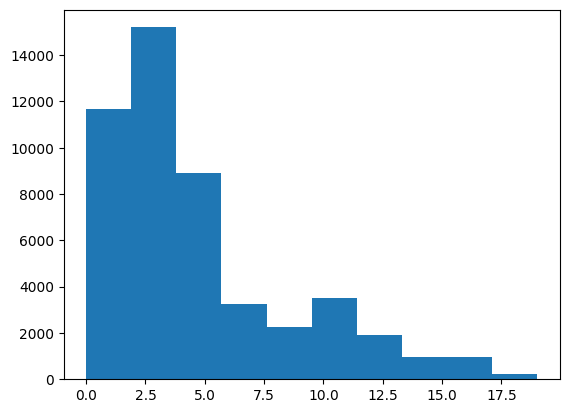

In [123]:
import matplotlib.pyplot as plt
plt.hist(data.nearby_subway_line_counts)

In [82]:
data.to_csv("airbnb_data.csv")

### **Note** that you need to import the new dataset that now contains the number of nearby subway stations to a certain Airbnb

In [3]:
data = pd.read_csv(r"C:\Users\heada\Documents\Fall Semester 2023\QTM 347 Machine Learning\Course Project\airbnb_data.csv")

In [4]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,nearby_subway_line_counts
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,3
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,19
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,4
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,3


### See the new column `nearby_subway_line_counts`? 

# Dropping Columns and Creating Binary Columns

In [5]:
columns_to_remove = ['name', 'host_name', 'last_review', 'Unnamed: 0']
data.drop(columns=columns_to_remove, inplace=True)

In [6]:
ty = pd.get_dummies(data['neighbourhood_group'],dtype=int)
data = data.drop('neighbourhood_group',axis = 1)
data = data.join(ty)

ty = pd.get_dummies(data['neighbourhood'],dtype=int)
data = data.drop('neighbourhood',axis = 1)
data = data.join(ty)

ty = pd.get_dummies(data['room_type'],dtype=int)
data = data.drop('room_type',axis = 1)
data = data.join(ty)

# Multiple Imputation 

### Using multiple imputation to account for the 10,051 missing values for the ‘reviews_per_month’ column. 

In [7]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
data_imput = data
data_imput = mice_imputer.fit_transform(data_imput)
data=pd.DataFrame(data_imput, columns=data.columns)

(CVXPY) Dec 03 08:14:29 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Dec 03 08:14:29 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Dec 03 08:14:29 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


# Dropping all Zero Values for Price

In [8]:
data = data[data['price'] != 0]

# Log of Price Variable

In [9]:
data['log_price'] = np.log(data['price'])

# Final Checks 

In [10]:
data.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room,log_price
0,2539.0,2787.0,40.64749,-73.97237,149.0,1.0,9.0,0.210000,6.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.003946
1,2595.0,2845.0,40.75362,-73.98377,225.0,1.0,45.0,0.380000,2.0,355.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.416100
2,3647.0,4632.0,40.80902,-73.94190,150.0,3.0,0.0,-0.731736,1.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.010635
3,3831.0,4869.0,40.68514,-73.95976,89.0,1.0,270.0,4.640000,1.0,194.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.488636
4,5022.0,7192.0,40.79851,-73.94399,80.0,10.0,9.0,0.100000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.382027


In [11]:
missing_values_per_column = data.isnull().sum()
print("Columns with missing values:")
print(missing_values_per_column[missing_values_per_column > 0])

Columns with missing values:
Series([], dtype: int64)


In [12]:
min(data.log_price)

2.302585092994046

In [13]:
min(data.price)

10.0